# **Final Project Worksheet - Rakamin Academy Data Science Batch V** #
## Kelompok: **Astro Boys** ##
### Dataset : Health Insurance ##
### Anggota: ###

- Robertsen Putra Sugianto
- Tossy Adhahir Rukmana Rauf
- Afiqi Ilman Pasha
- Bintang Adi Kusuma
- Arry Averrus Adhiputra


## **1. Load Dataset**

### Library yang digunakan

In [ ]:
pip install category_encoders -q

     |████████████████████████████████| 81kB 3.4MB/s 


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

# Feature extraction
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

### Load Dataset

Data set yang digunakan diambil dari: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/AstroBoys_Notebook/data/'

df_train = pd.read_csv(path + 'train.csv')

In [ ]:
df_train.head()

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1    Male   44  ...                  26.0      217         1
1   2    Male   76  ...                  26.0      183         0
2   3    Male   47  ...                  26.0       27         1
3   4    Male   21  ...                 152.0      203         0
4   5  Female   29  ...                 152.0       39         0

[5 rows x 12 columns]

## **2. Data Exploration**

#### Describe Data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Pada penggambaran informasi data di atas, terlihat bahwa total terdapat total 12 kolom, 381.109 baris data, serta tidak ada data yang hilang. Dengan 3 kolom diantaranya bersifat kategoris (Gender, Vehicle_Age, Vehicle_Damage), dan 8 kolom sisanya bersifat numerik.

Definisi kolom:

1. id: Nomor identitas unik untuk setiap pelanggan
2. Gender: Jenis kelamin pelanggan
3. Age: Umur pelanggan
4. Driving_License: Apakah pelanggan memiliki SIM atau tidak (Nilai 0: Tidak punya SIM, Nilai 1: Punya SIM)  
5. Region_Code: Kode pos unik untuk setiap wilayah tempat tinggal pelanggan
6. Previously_Insured: Apakah pelanggan sebelumnya pernah memiliki Asuransi Kendaraan (Nilai 0: Tidak pernah punya Asuransi, Nilai 1: Pernah punya Asuransi)
7. Vehicle_Age: Umur kendaraan pelanggan
8. Vehicle_Damage: Apakah kendaraan pelanggan sebelumnya pernah rusak (Nilai 0: Tidak pernah rusak, Nilai 1: Pernah rusak)
9. Annual_Premium: Jumlah biaya premi yang harus dibayarkan pelanggan setiap tahun
10. Policy_Sales_Channel: Kode anonim untuk setiap jalur penawaran ke pelanggan, contohnya melalui Agen, Surat, Telepon, Secara Langsung, dll.)
11. Vintage: Jumlah hari, seberapa lama pelanggan terasosiasikan dengan perusahaan
12. Response: Apakah pelanggan tertarik dengan Asuransi Kendaraan (Nilai 0: Tidak tertarik, Nilai 1: Tertarik)

In [ ]:
df_train.isnull().sum().reset_index()

index  0
0                     id  0
1                 Gender  0
2                    Age  0
3        Driving_License  0
4            Region_Code  0
5     Previously_Insured  0
6            Vehicle_Age  0
7         Vehicle_Damage  0
8         Annual_Premium  0
9   Policy_Sales_Channel  0
10               Vintage  0
11              Response  0

Pada tabel data di atas, terlihat bahwa dari semua 11 kolom yang tersedia, tidak ada satupun yang memiliki data Null (hilang).

Hanya 12.256336113815209 % dari semua populasi di mana response bernilai 1 

#### Pendekatan Numerik

In [ ]:
df_train.describe()

id            Age  ...        Vintage       Response
count  381109.000000  381109.000000  ...  381109.000000  381109.000000
mean   190555.000000      38.822584  ...     154.347397       0.122563
std    110016.836208      15.511611  ...      83.671304       0.327936
min         1.000000      20.000000  ...      10.000000       0.000000
25%     95278.000000      25.000000  ...      82.000000       0.000000
50%    190555.000000      36.000000  ...     154.000000       0.000000
75%    285832.000000      49.000000  ...     227.000000       0.000000
max    381109.000000      85.000000  ...     299.000000       1.000000

[8 rows x 9 columns]

Pada penggambaran data numerik di atas, terlihat bahwa secara umum, tidak ada data yang secara statistik terlihat aneh, terkecuali kolom Annual_Premium yang memiliki nilai maksimum yang sangat besar dan berbeda jauh dengan nilai minimum. Masukan datanya pun terlihat sama, yakni 381.109 masukan data.

In [ ]:
df_train[['Gender','Vehicle_Age','Vehicle_Damage']].describe()

Gender Vehicle_Age Vehicle_Damage
count   381109      381109         381109
unique       2           3              2
top       Male    1-2 Year            Yes
freq    206089      200316         192413

Pada penggambaran di atas, tampak bahwa data kategoris bersifat wajar. Dengan kolom Gender, memiliki 2 nilai unik, dengan modus yaitu kelompok data Male, dengan kemunculan sebanyak 206.089 kali. Di sisi lain, kolom Vehicle_Age, memiliki 2 nilai unik, dengan modus yaitu kelompok data 1-2 Year, dengan frekuensi nilai sebanyak 200.316. Pada kolom Gender, terlihat bahwa kolom tersebut memiliki 2 nilai unik, dengan modus yaitu kelompok data Yes, dengan kemunculan sebanyak 192.413 kali. Masukan datanya pun terlihat sama, yakni 381.109 masukan data.

#### Pendekatan Grafis: Univariate Analysis

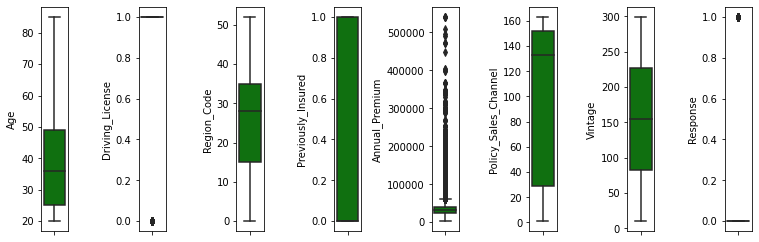

In [ ]:
features1a=['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
plt.figure(figsize=(12,20))
for i in range(0,len(features1a)):
    plt.subplot(6,9,i+1)
    sns.boxplot(y=df_train[features1a[i]],color='green',orient='v')
    plt.tight_layout()

Dari grafik yang dihasilkan, terdapat Outliers yang cukup banyak untuk kolom Annual_Premium, dengan jumlah cukup yang besar dan jauh

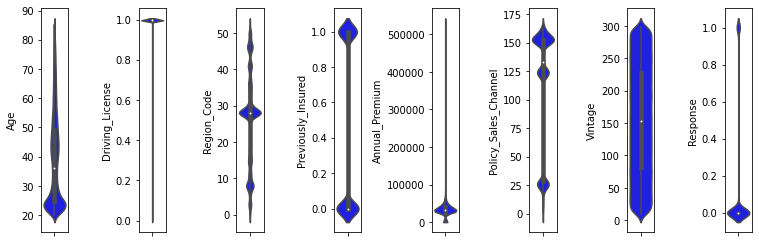

In [ ]:
plt.figure(figsize=(12,20))
for i in range(0,len(features1a)):
    plt.subplot(6,9,i+1)
    sns.violinplot(y=df_train[features1a[i]],color='blue',orient='v')
    plt.tight_layout()

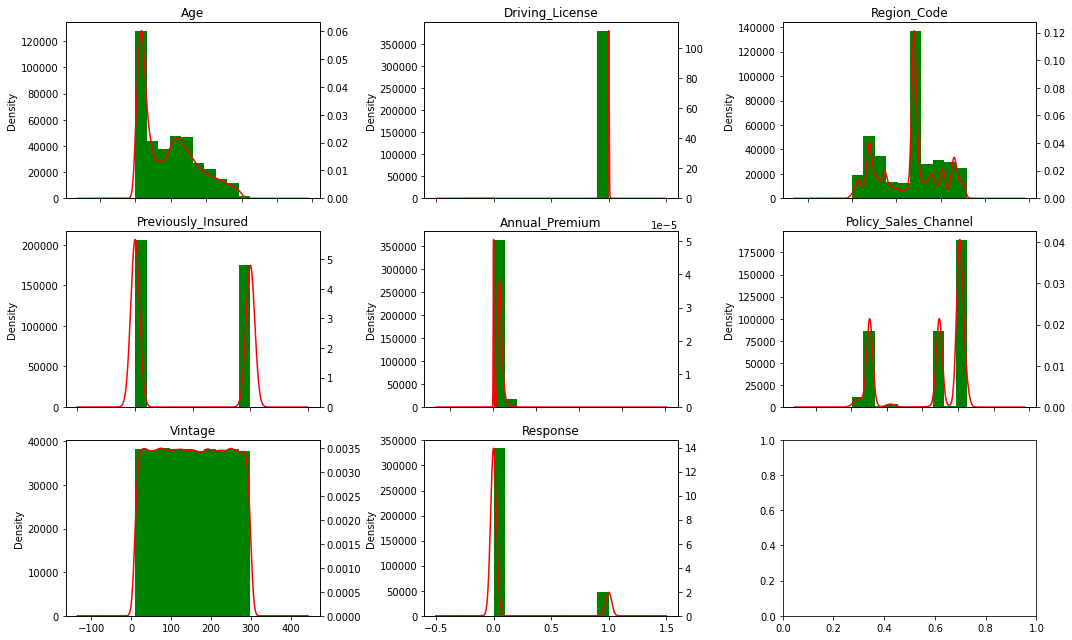

In [ ]:
data_num1=df_train[features1a]
k=len(data_num1.columns)
n=3
m=(k-1)//n+1
fig,axes=plt.subplots(m,n,figsize=(n*5,m*3))
for i,(name,col) in enumerate(data_num1.iteritems()):
    r,c=i//n,i%n
    ax=axes[r,c]
    col.hist(ax=ax,color='green')
    ax2=col.plot.kde(ax=ax,secondary_y=True,title=name,color='red')
    ax2.set_ylim(0)

fig.tight_layout()

Berdasarkan grafik di atas, terlihat bahwa distribusi Age bersifat Positively Skewed. Response pun juga cukup timpang

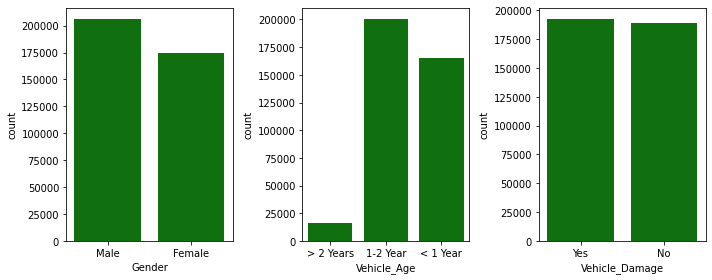

In [ ]:
features1b=['Gender','Vehicle_Age','Vehicle_Damage']
plt.figure(figsize=(10,4))
for i in range(0,len(features1b)):
    plt.subplot(1,3,i+1)
    sns.countplot(x=df_train[features1b[i]],color='green',orient='v')
    plt.tight_layout()

Dari grafik itu, tampak bahwa Vehicle_Damage memiliki distribusi data yang cukup seimbang. Sementara itu, untuk Vehicle_Age cukup timpang, dengan kategori nilai >2 Years kalah jauh dengan yang lain.

#### Pendekatan Grafis: Multivariate Analysis

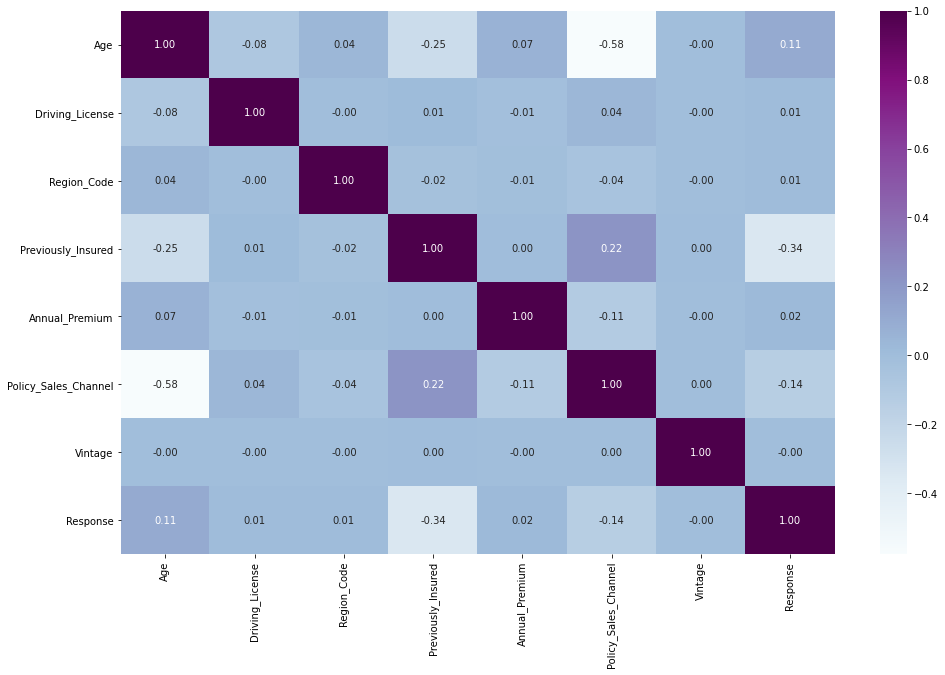

In [ ]:
corr_=df_train[features1a].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_,annot=True,fmt=".2f",cmap="BuPu");

Dari grafik Heatmap tersebut, sejauh ini tidak tampak kolom yang memiliki korelasi kuat (nilai > 0.7)

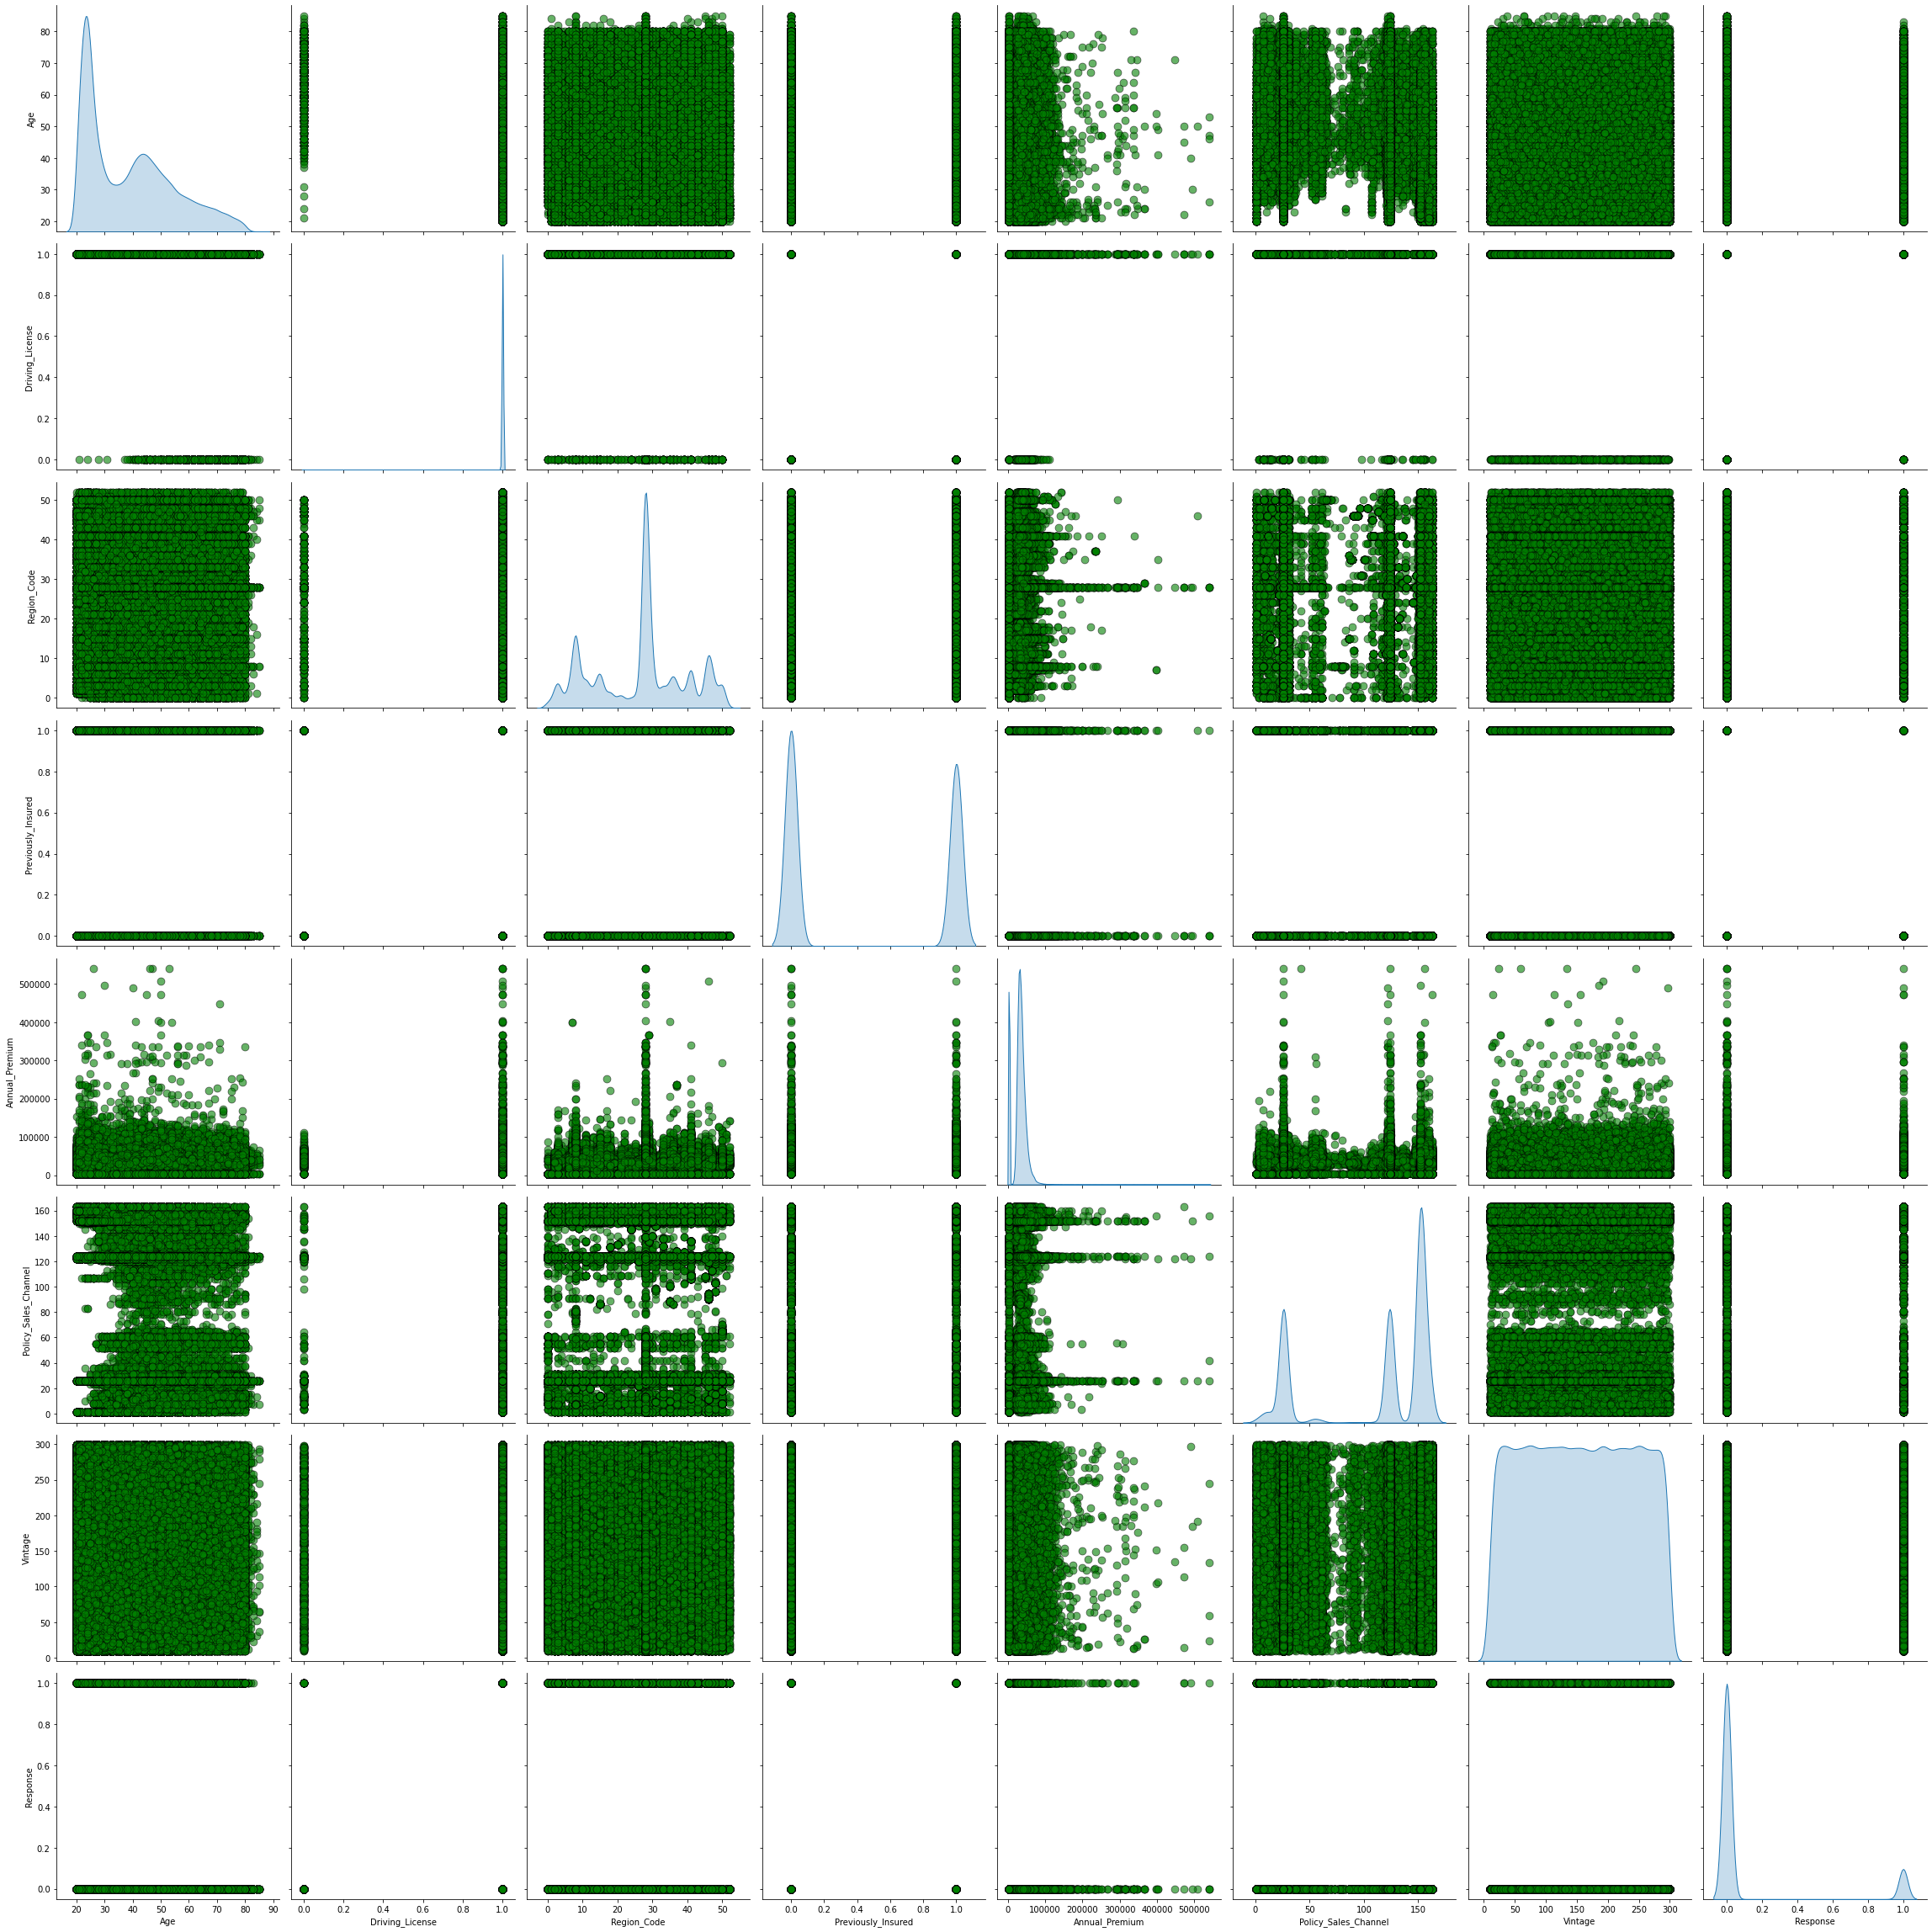

In [ ]:
sns.pairplot(df_train[features1a],
             diag_kind='kde',
             plot_kws={'alpha':0.6,'s':80,'edgecolor':'k','color':'green'},
             size=4);

plt.tight_layout()

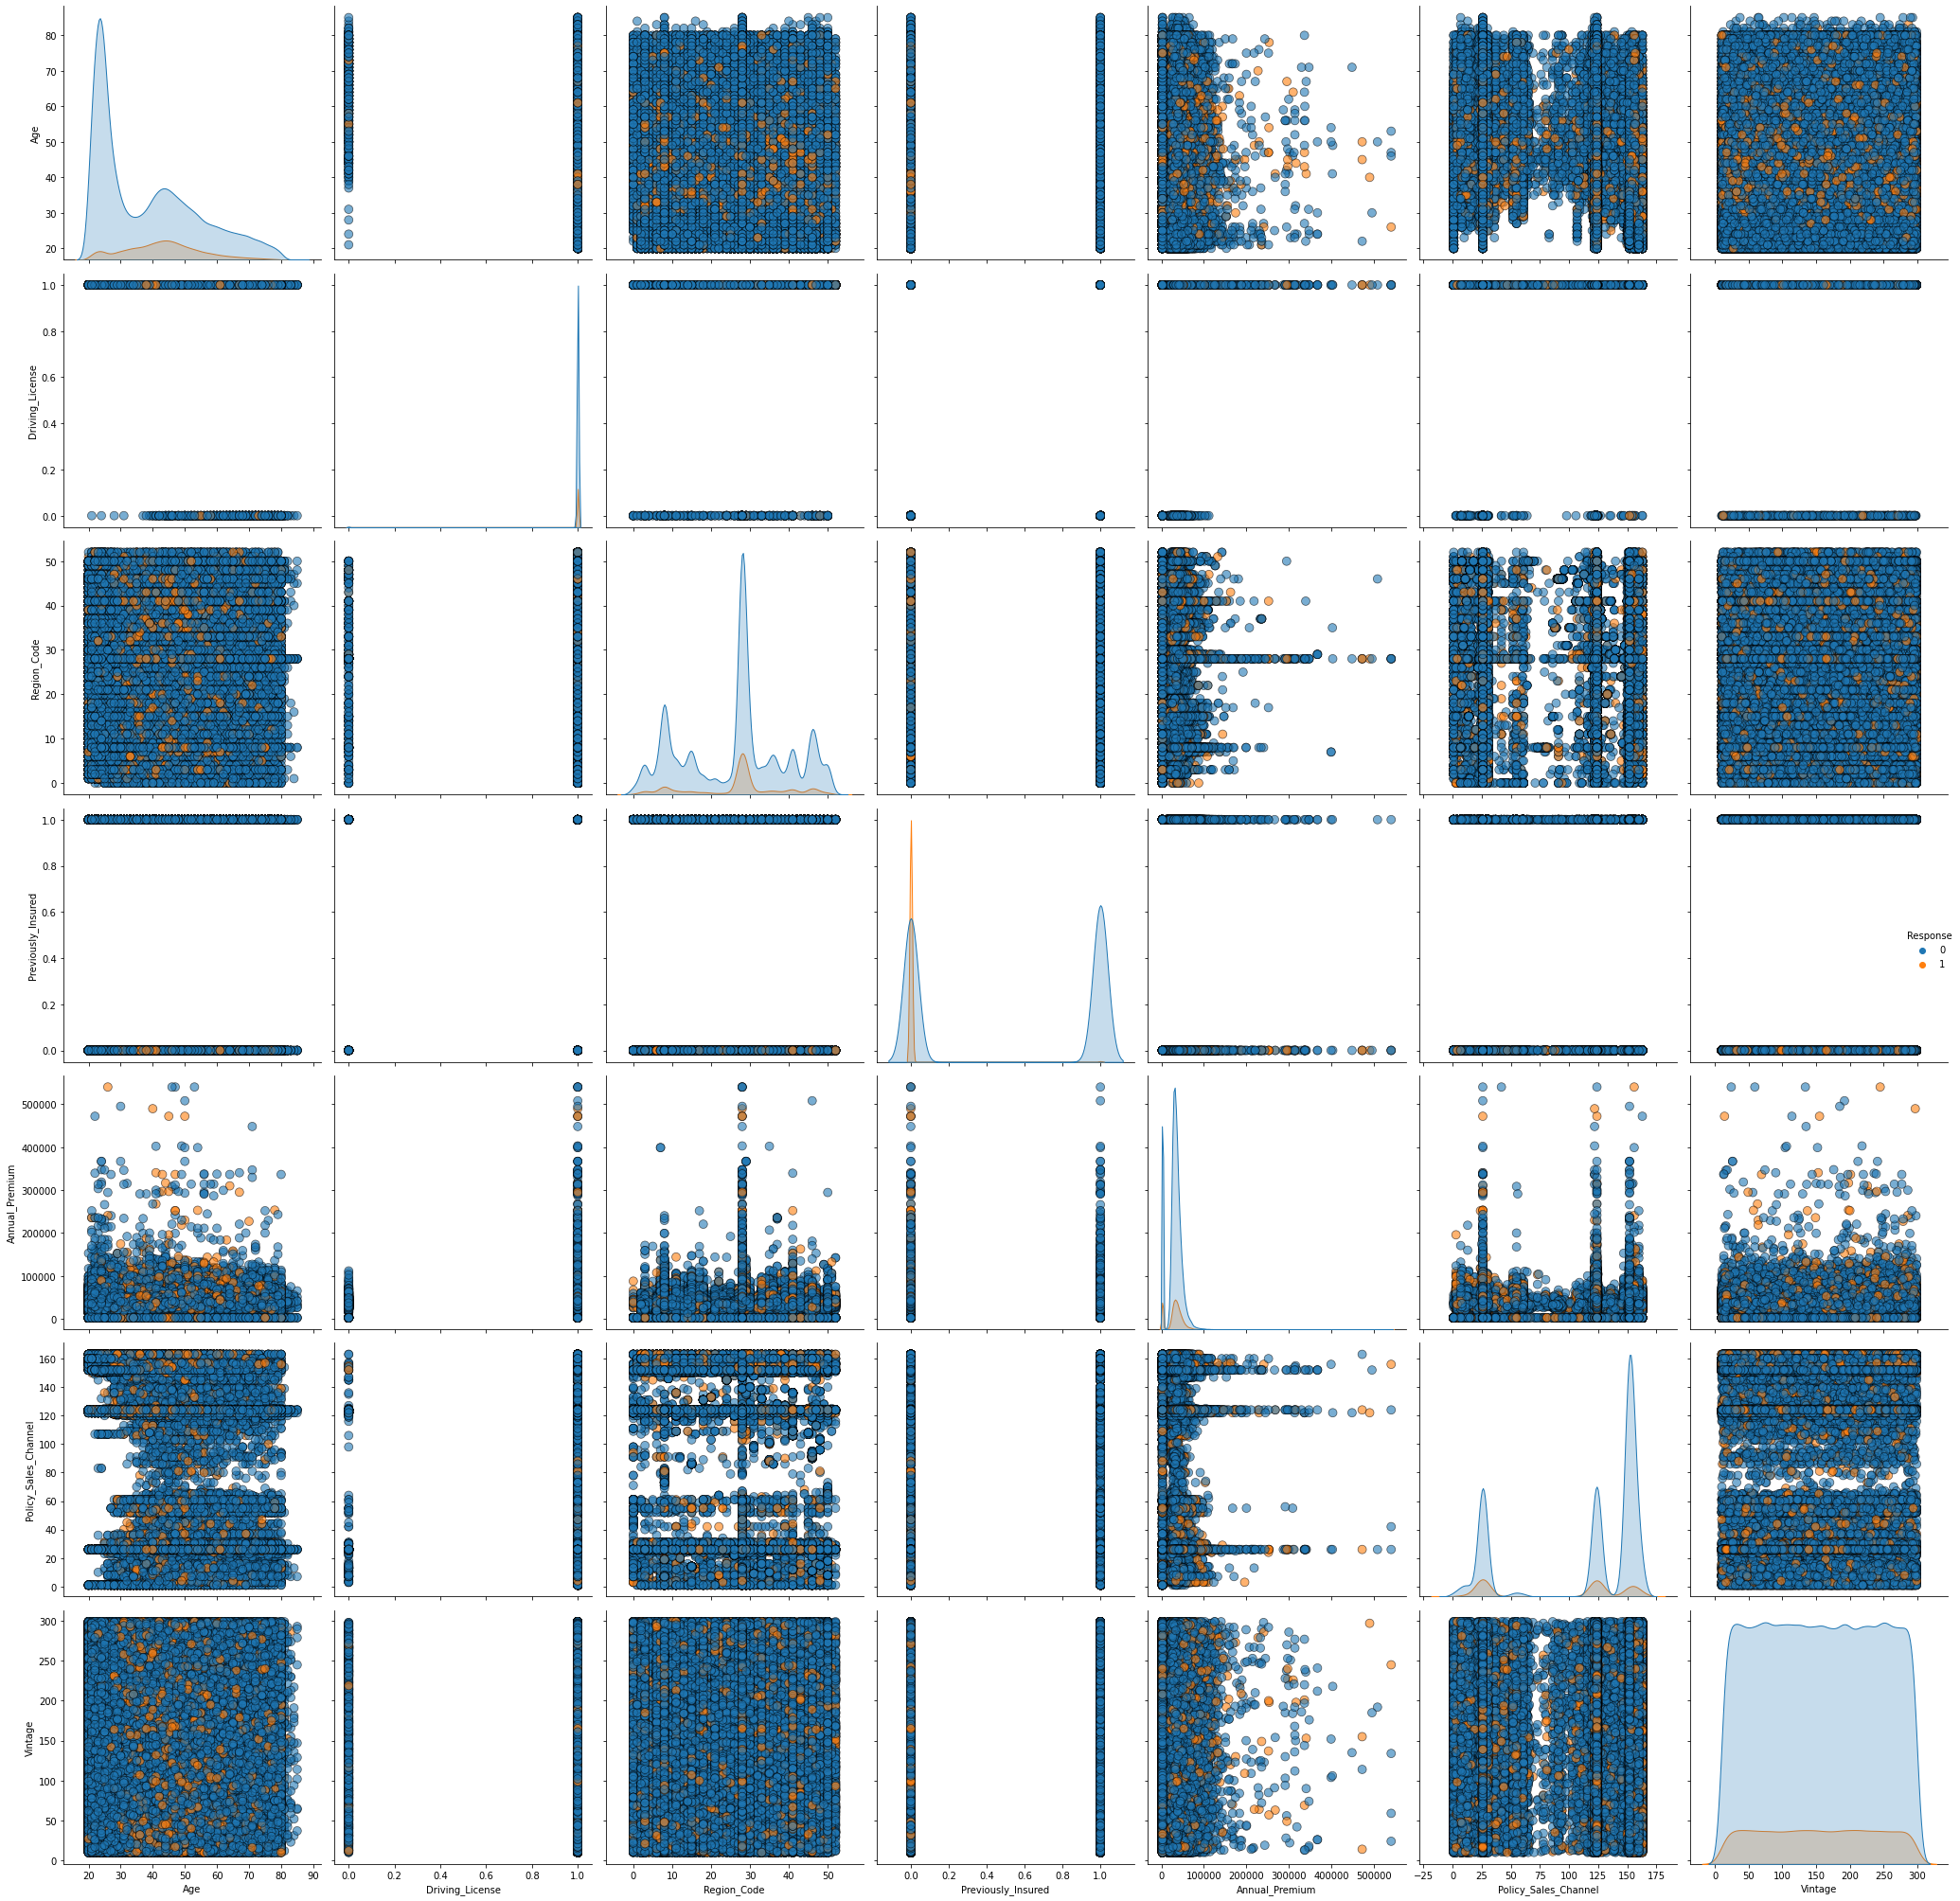

In [ ]:
sns.pairplot(df_train[features1a],
             diag_kind='kde',hue='Response',
             plot_kws={'alpha':0.6,'s':80,'edgecolor':'k','color':'green'},
             size=4);

plt.tight_layout()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))
g=sns.catplot(x='Vehicle_Damage',y='Annual_Premium',hue='Response',data=df_train,ax=ax1)
g=sns.catplot(x='Vehicle_Damage',y='Annual_Premium',hue='Response',kind='swarm',data=df_train,ax=ax2)

Text(0, 0.5, 'Response Probability')

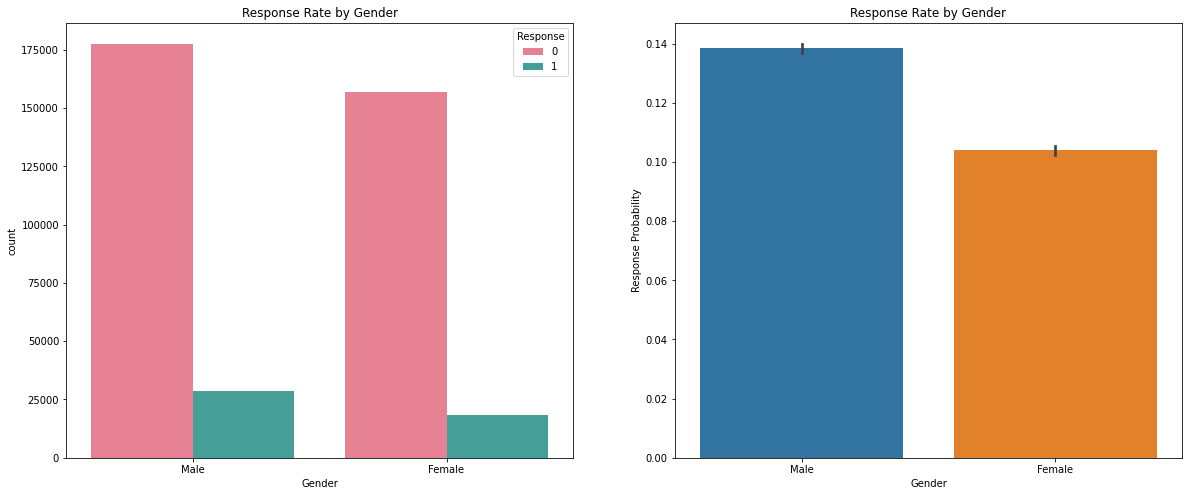

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Gender',hue='Response',data=df_train,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Gender')

g=sns.barplot(x='Gender',y='Response',data=df_train,ax=ax2)
ax2.set_title('Response Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Response Probability')

Text(0, 0.5, 'Response Probability')

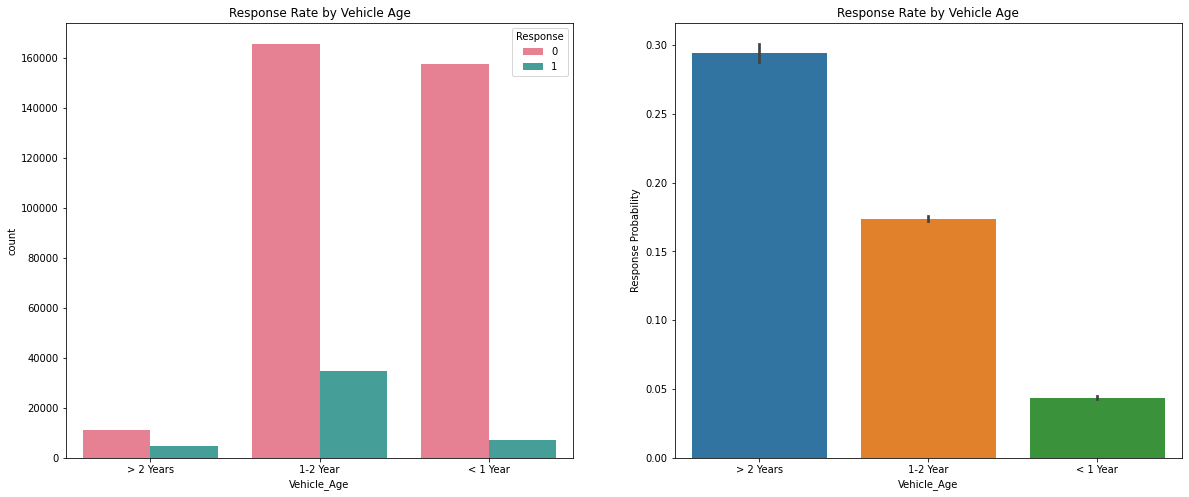

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Vehicle_Age',hue='Response',data=df_train,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Vehicle Age')

g=sns.barplot(x='Vehicle_Age',y='Response',data=df_train,ax=ax2)
ax2.set_title('Response Rate by Vehicle Age')
ax2.set_xlabel('Vehicle_Age')
ax2.set_ylabel('Response Probability')

Text(0, 0.5, 'Response Probability')

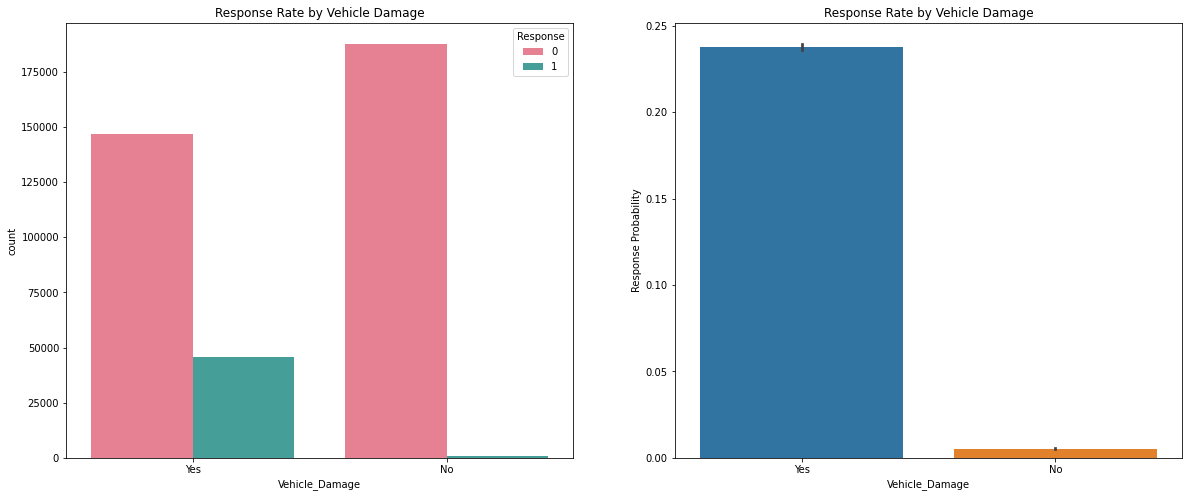

In [ ]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
g=sns.countplot('Vehicle_Damage',hue='Response',data=df_train,ax=ax1,palette='husl')
ax1.set_title('Response Rate by Vehicle Damage')

g=sns.barplot(x='Vehicle_Damage',y='Response',data=df_train,ax=ax2)
ax2.set_title('Response Rate by Vehicle Damage')
ax2.set_xlabel('Vehicle_Damage')
ax2.set_ylabel('Response Probability')

## **3. Data Cleaning**

#### Cek Missing Value

In [ ]:
data_missing_value = df_train.isnull().sum().reset_index()
data_missing_value

index  0
0                     id  0
1                 Gender  0
2                    Age  0
3        Driving_License  0
4            Region_Code  0
5     Previously_Insured  0
6            Vehicle_Age  0
7         Vehicle_Damage  0
8         Annual_Premium  0
9   Policy_Sales_Channel  0
10               Vintage  0
11              Response  0

In [ ]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Cek Duplikat

In [ ]:
df_train.duplicated().sum()

0

#### Persebaran data analysis dengan boxplot

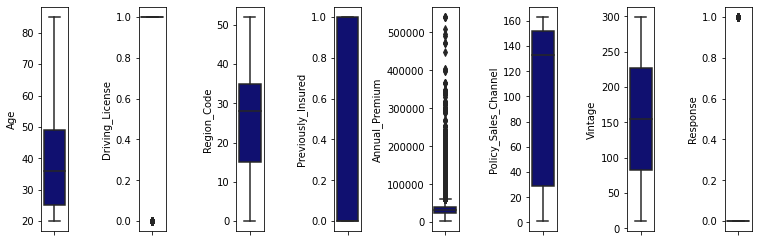

In [ ]:
features =  ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
plt.figure(figsize=(12,20))
for i in range(0, len(features)):
    plt.subplot(6,9,i+1)
    sns.boxplot(y = df_train[features[i]],color='Navy',orient='v')
    plt.tight_layout()

Dapat dilihat pada variabel *Annual_Premium* terdapat outlier yang sangat banyak

#### Normalization

In [ ]:
data_tes = df_train

Text(0.5, 0, '')

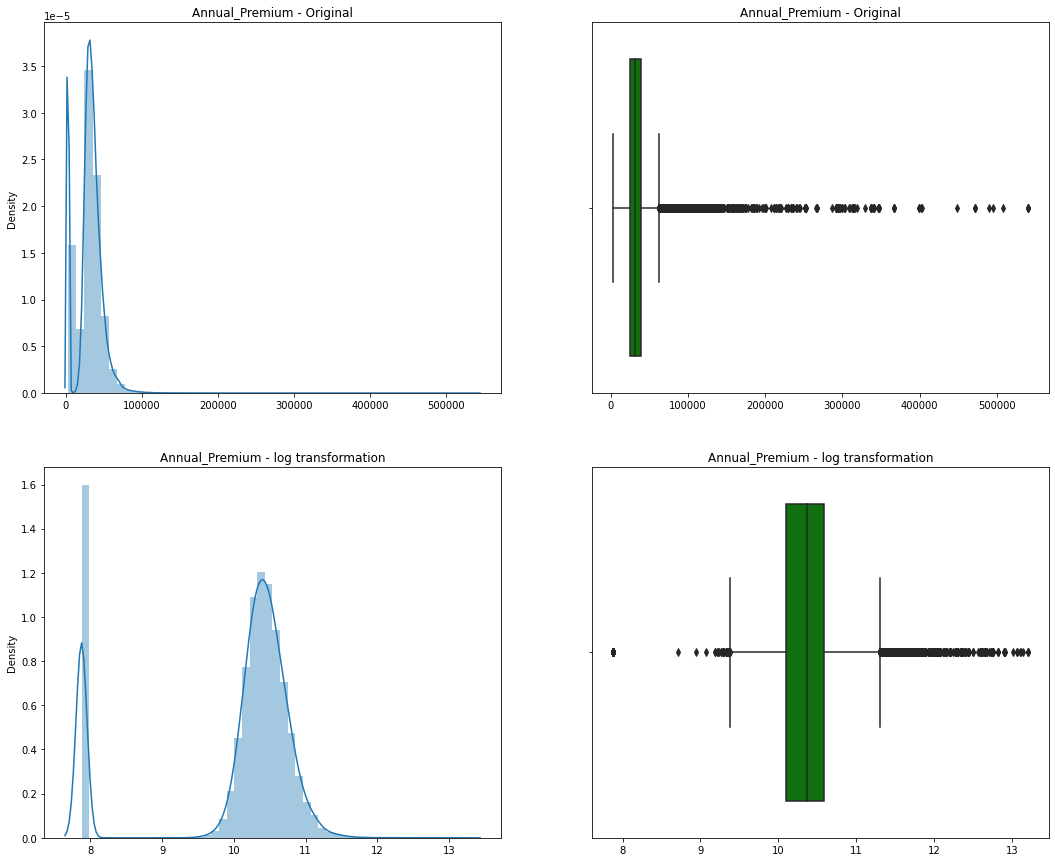

In [ ]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(data_tes['Annual_Premium'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Annual_Premium - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(data_tes['Annual_Premium'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Annual_Premium - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(data_tes['Annual_Premium']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Annual_Premium - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(data_tes['Annual_Premium']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Annual_Premium - log transformation')
ax[1,1].set_xlabel('')


#### Mendeteksi & Membuang outlier

In [ ]:
Q1 = data_tes['Annual_Premium'].quantile(0.25)
Q3 = data_tes['Annual_Premium'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data_tes['Annual_Premium'] >= low_limit) & (data_tes['Annual_Premium'] <= high_limit))
data_tes = data_tes[filtered_entries]

In [ ]:
data_tes.shape

(370789, 12)

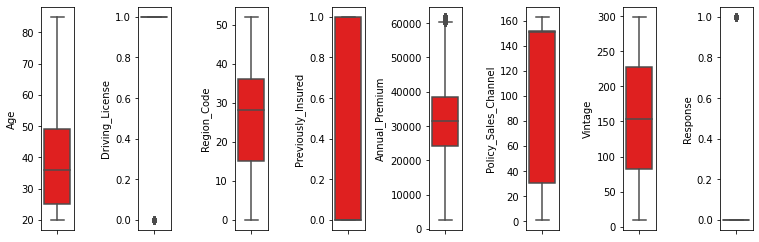

In [ ]:
features11 =  ['Age','Driving_License','Region_Code','Previously_Insured','Annual_Premium','Policy_Sales_Channel','Vintage','Response']
plt.figure(figsize=(12,20))
for i in range(0, len(features11)):
    plt.subplot(6,9,i+1)
    sns.boxplot(y = data_tes[features11[i]],color='Red',orient='v')
    plt.tight_layout()

## **4. Feature Engineering**

#### Merging Features

In [ ]:
df_merge = data_tes
merged_value = ['> 2 Years', '1-2 Year']
df_merge['Vehicle_Age'] = np.where(df_merge['Vehicle_Age'].isin(merged_value), '> 1 Year', '< 1 Year')

#### Standardization / Normailization

In [ ]:
print(df_merge.shape)
print(df_train.shape)

(370789, 12)
(381109, 12)


In [ ]:
df_merge.head()

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1    Male   44  ...                  26.0      217         1
1   2    Male   76  ...                  26.0      183         0
2   3    Male   47  ...                  26.0       27         1
3   4    Male   21  ...                 152.0      203         0
4   5  Female   29  ...                 152.0       39         0

[5 rows x 12 columns]

In [ ]:
# Fungsi normalisasi atau standardisasi
def normalize_standardize(data, op = 'standardize'):
  if (op == 'standardize'):
    sc_data = StandardScaler().fit_transform(data.values.reshape(len(data),1 ))
    return sc_data
  elif (op == 'normalize'):
    sc_data = StandardScaler().MinMaxScaler().fit_transform(data.values.reshape(len(data),1 ))
    return sc_data
  else:
    print("Operasi yang dimasukan bukan 'normalze' atau 'standardize'. Silakan coba lagi...")
    return 0

In [ ]:
# Pisahin antara numerik yang mau distandardisasi, ngilangin id, driving_license, previously_insured, dan response
numerical_column = ['Age', 'Annual_Premium', 'Policy_Sales_Channel','Vintage' ]

# Pisahin kolom string (objek)
object_column = list(df_train.select_dtypes(include = ['object']).columns)

# Bikin dataframe baru biar ga harus ulang dari awal kalau error
df_std = df_merge

# Standardisasi setiap kolom
for feature in numerical_column:
  df_std[feature] = normalize_standardize(df_std[feature], 'standardize')

# Tampilkan data setelah standardisasi
df_std

id  Gender       Age  ...  Policy_Sales_Channel   Vintage  Response
0            1    Male  0.345182  ...             -1.601474  0.748826         1
1            2    Male  2.417701  ...             -1.601474  0.342470         0
2            3    Male  0.539480  ...             -1.601474 -1.521990         1
3            4    Male -1.144442  ...              0.730152  0.581503         0
4            5  Female -0.626312  ...              0.730152 -1.378570         0
...        ...     ...       ...  ...                   ...       ...       ...
381104  381105    Male  2.288169  ...             -1.601474 -0.792938         0
381105  381106    Male -0.561545  ...              0.730152 -0.279017         0
381106  381107    Male -1.144442  ...              0.878192  0.079533         0
381107  381108  Female  1.899571  ...              0.212013 -0.960262         0
381108  381109    Male  0.474714  ...             -1.601474  0.987859         0

[370789 rows x 12 columns]

#### Encoding

In [ ]:
# Buat dataframe baru
df_encoded = df_std
object_column = list(df_std.select_dtypes(include = ['object']).columns)

print("Shape before encoding:",df_encoded.shape)
print("Column to be encoded:",object_column)

# One Hot Encoding
for feature in object_column:
  dummies = pd.get_dummies(df_encoded[feature], prefix=feature, drop_first = True)
  # Append ke dataframe awal
  df_encoded = pd.concat([df_encoded, dummies], axis=1)

print("Shape after encoding:", df_encoded.shape)

# Hapus kolom yang sudah di encoding
df_encoded = df_encoded.drop(object_column,axis= 1)
print("Shape after dropping column:", df_encoded.shape)
df_encoded.head()

Shape before encoding: (370789, 12)
Column to be encoded: ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
Shape after encoding: (370789, 15)
Shape after dropping column: (370789, 12)


id       Age  ...  Vehicle_Age_> 1 Year  Vehicle_Damage_Yes
0   1  0.345182  ...                     1                   1
1   2  2.417701  ...                     1                   0
2   3  0.539480  ...                     1                   1
3   4 -1.144442  ...                     0                   0
4   5 -0.626312  ...                     0                   0

[5 rows x 12 columns]

In [ ]:
# Change Region Code type to string 
df_encoded['Region_Code'] = df_encoded['Region_Code'].astype(str)
print('Ada',df_encoded['Region_Code'].value_counts().count(), 'unique value pada Region_Code yang perlu diencode')

# Encoding with Binary Encoder
rc_encoded = ce.BinaryEncoder().fit_transform(df_encoded['Region_Code'])
print('Jumlah kolom yang terbentuk dari proses encoding region code:', rc_encoded.shape[1])
df_encoded = pd.concat([df_encoded, rc_encoded], axis = 1)
df_encoded = df_encoded.drop(['Region_Code', 'Region_Code_0'], axis =1)
df_encoded.head()

Ada 53 unique value pada Region_Code yang perlu diencode
Jumlah kolom yang terbentuk dari proses encoding region code: 7


id       Age  Driving_License  ...  Region_Code_4  Region_Code_5  Region_Code_6
0   1  0.345182                1  ...              0              0              1
1   2  2.417701                1  ...              0              1              0
2   3  0.539480                1  ...              0              0              1
3   4 -1.144442                1  ...              0              1              1
4   5 -0.626312                1  ...              1              0              0

[5 rows x 17 columns]

#### Class Imbalance Handling

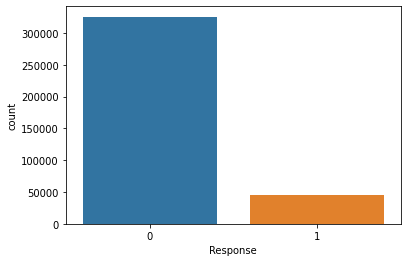

In [ ]:
# Pesebaran sebelum handling class imbalance
sns.countplot(x = 'Response', data = df_encoded)

In [ ]:
from imblearn import under_sampling, over_sampling

# Pemisahan fitur dan target
X = df_encoded.drop(['Response'],axis=1)
x_columns = list(X.columns)
y = df_encoded['Response']

# Under sampling
X_under, y_under = under_sampling.RandomUnderSampler(random_state=42).fit_resample(X, y)

# Mengubah numpy array ke Dataframe agar bisa diconcat
X_under = pd.DataFrame(X_under)
y_under = pd.DataFrame(y_under)

# Rename lagi biar namanya ga 0,1,2,3,4,.... 
X_under.columns = x_columns
y_under = y_under.rename(columns = {0: 'Response'})

# Concat dan buat dataframe baru
df_under = pd.concat([X_under,y_under], axis = 1)

# Hapus id
df_under = df_under.drop('id',axis =1)

df_under.head()

Age  Driving_License  ...  Region_Code_6  Response
0 -1.144442              1.0  ...            1.0         0
1 -0.885377              1.0  ...            1.0         0
2  0.863312              1.0  ...            1.0         0
3 -0.691078              1.0  ...            1.0         0
4  0.345182              1.0  ...            1.0         0

[5 rows x 16 columns]

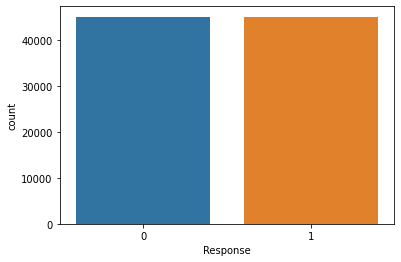

In [ ]:
# Setelah class imbalance
sns.countplot(x = 'Response', data = df_under)

In [ ]:
print(df_under['Response'].value_counts())
print(df_under.shape)

1    45155
0    45155
Name: Response, dtype: int64
(90310, 16)


#### Penentuan Feature

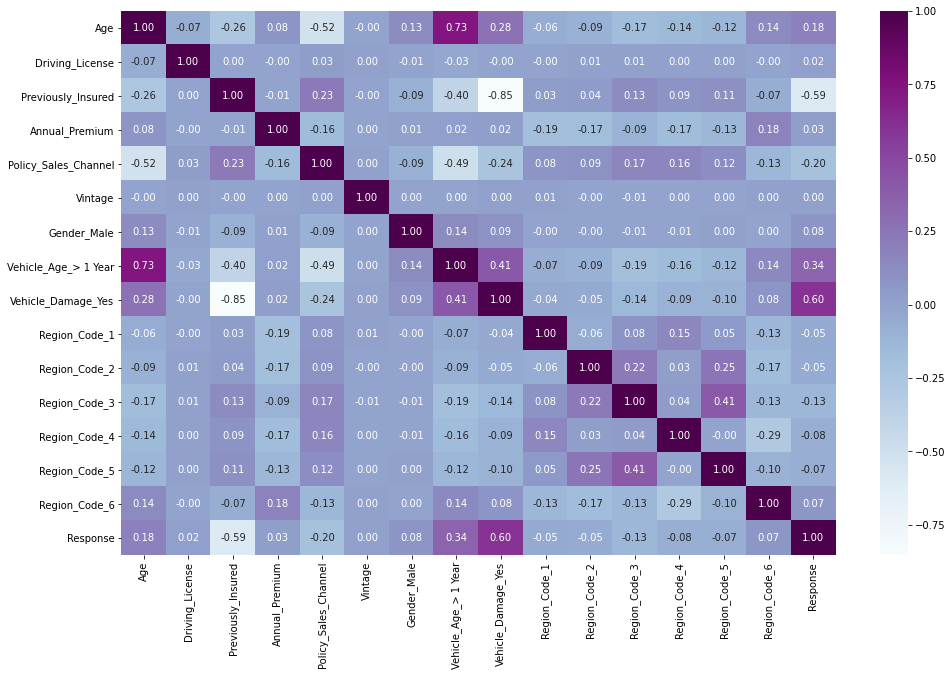

In [ ]:
# Buat df baru
df_final = df_under

features = list(df_final.columns)
corr_= df_final[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Pada tahap awal, akan digunakan keseluruhan fiturnya terlebih dahulu (hanya dengan menghapus id)

Untuk tahap selanjutnya apabila performa model kurang baik, akan digunakan fitur demikian:

*   Age
*   Previously_Insurance
*   Policy_Sales_Channel
*   Vehicle_Age
*   Vehicle_Damage

Dan membuang:

*   id
*   Driving Lcense 
*   Region_Code
*   Annual_Premium
*   Vintage
*   Gender

# **STAGE 2**

## **0.LOAD DATA AWAL**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/AstroBoys_Notebook/data/'

df= pd.read_csv(path + 'train.csv')

In [ ]:
df.head()

id  Gender  Age  ...  Policy_Sales_Channel  Vintage  Response
0   1    Male   44  ...                  26.0      217         1
1   2    Male   76  ...                  26.0      183         0
2   3    Male   47  ...                  26.0       27         1
3   4    Male   21  ...                 152.0      203         0
4   5  Female   29  ...                 152.0       39         0

[5 rows x 12 columns]

## **1. INSIGHT**

Text(-0.8, 210000, 'more about taking out insurance')

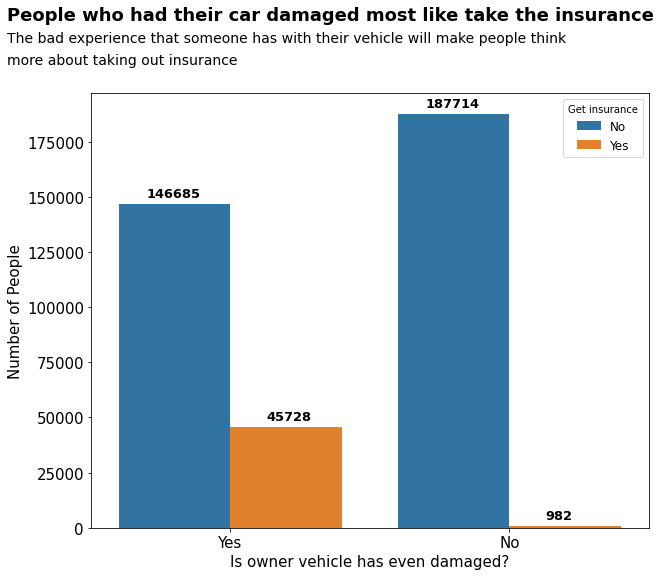

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot('Vehicle_Damage', hue ='Response', data = df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Is owner vehicle has even damaged?',fontsize=15)
plt.ylabel(ylabel = 'Number of People',fontsize=15)
plt.legend(title = 'Get insurance', labels = ['No','Yes'], fontsize = 12)
df_insight_damage = df.groupby(['Vehicle_Damage','Response'])['id'].count().reset_index().rename(columns={'id' : 'count'})
res_insight_damage = list(df_insight_damage['Response'])
dam_insight_damage = list(df_insight_damage['Vehicle_Damage'])
count_insight_damage = list(df_insight_damage['count'])
for i in range(0,len(res_insight_damage)):
    plt.text(x = (0 if dam_insight_damage[i] == 'Yes' else 1) + (-0.3 if res_insight_damage[i]%2 == 0 else 0.13) 
             , y = count_insight_damage[i] +3000
             , s=str(count_insight_damage[i])
             , fontsize=13 
             , fontweight='bold')

plt.text(x =-0.8, y= 230000, s = 'People who had their car damaged most like take the insurance', fontweight = 'bold', fontsize = 18)
plt.text(x =-0.8, y= 220000, s = 'The bad experience that someone has with their vehicle will make people think ', fontsize = 14)
plt.text(x =-0.8, y= 210000, s = 'more about taking out insurance', fontsize = 14)


Text(2.9, 19300, 'confirmed to take insurance')

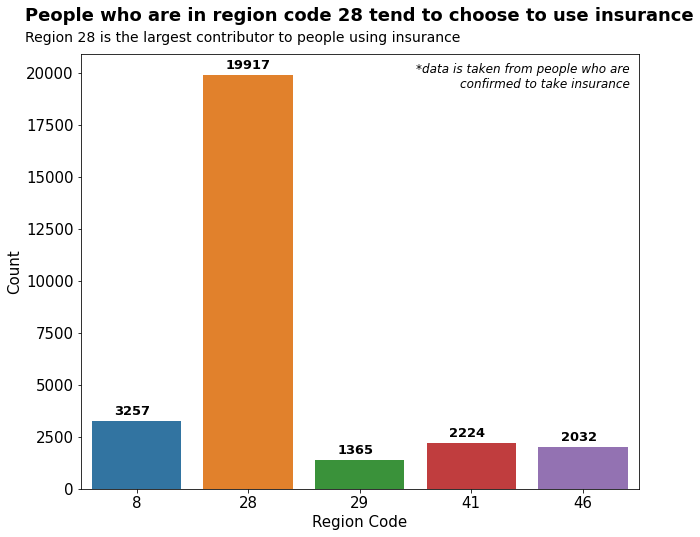

In [ ]:
df_insight_region = df[df['Response'] == 1].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(5)
df_insight_region['Region_Code'] = df_insight_region['Region_Code'].astype(int)

plt.figure(figsize = (10,8))
sns.barplot(x = 'Region_Code', y = 'Response', data =df_insight_region)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Code',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.2
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=13 
             , fontweight='bold')
    
plt.text(x =-1, y= 22500, s = 'People who are in region code 28 tend to choose to use insurance', fontweight = 'bold', fontsize = 18)
plt.text(x =-1, y= 21500, s = 'Region 28 is the largest contributor to people using insurance ', fontsize = 14)
plt.text(x =2.5, y= 20000, s = '*data is taken from people who are',fontstyle = 'italic', fontsize = 12)
plt.text(x =2.9, y= 19300, s = 'confirmed to take insurance',fontstyle = 'italic', fontsize = 12)


[3, 8, 11, 15, 28, 29, 30, 35, 36, 41, 46, 50]


Text(0, -0.7, 'insurance customers, followed by region code 29')

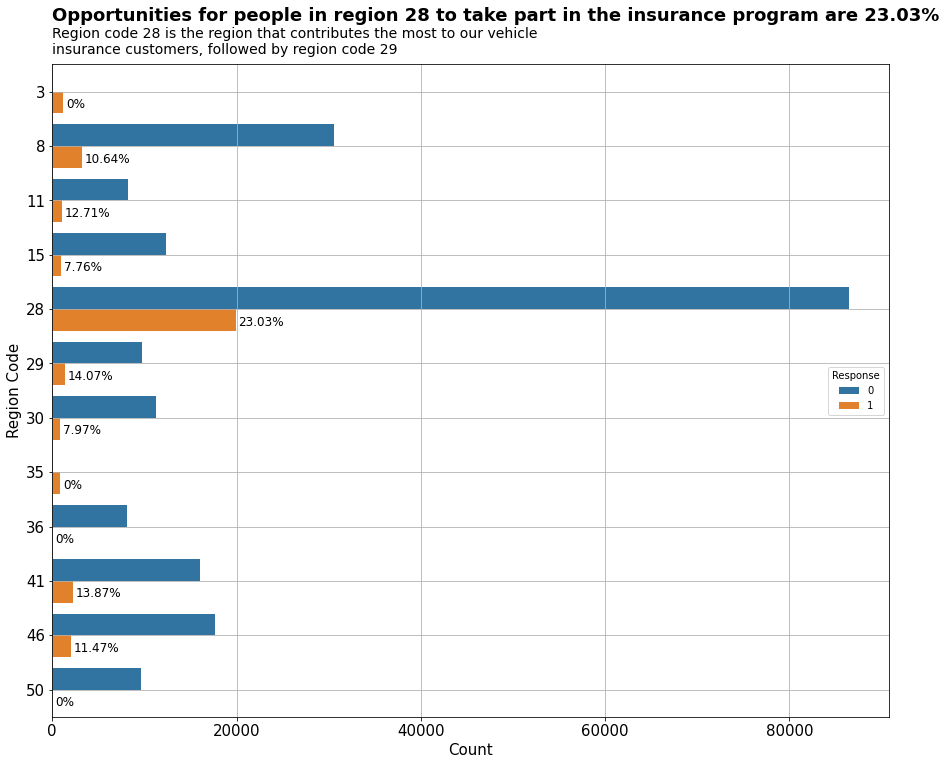

In [ ]:
df_insight_region_0 = df[df['Response'] == 0].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(10)
reg_insight_region_0 = list(df_insight_region_0.sort_values('Region_Code')['Region_Code'])
df_insight_region_1 = df[df['Response'] == 1].groupby('Region_Code').count().reset_index().sort_values('Response', ascending = False).head(10)
reg_insight_region_1 = list(df_insight_region_1.sort_values('Region_Code')['Region_Code'])

df_car_damage_0 = df[(df['Response'] == 0) & (df['Region_Code'].isin(reg_insight_region_0))]
df_car_damage_1 = df[(df['Response'] == 1) & (df['Region_Code'].isin(reg_insight_region_1))]

df_merge_car_damage = pd.concat([df_car_damage_0,df_car_damage_1])
df_merge_car_damage['Region_Code'] = df_merge_car_damage['Region_Code'].astype(int)

plt.figure(figsize=(15,12))
sns.countplot(y ='Region_Code', hue = 'Response', data= df_merge_car_damage)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel(ylabel = 'Region Code',fontsize=15)
plt.xlabel(xlabel = 'Count',fontsize=15)
plt.grid()

df_nol = df_merge_car_damage[df_merge_car_damage['Response'] == 0]['Region_Code'].value_counts().reset_index()
xlabel_reg_0 = list(df_nol['index'])
ylabel_reg_0 = list(df_nol['Region_Code'])
df_satu= df_merge_car_damage[df_merge_car_damage['Response'] == 1]['Region_Code'].value_counts().reset_index()
xlabel_reg_1 = list(df_satu['index'])
ylabel_reg_1 = list(df_satu['Region_Code'])

x_percentage = list(df_merge_car_damage.sort_values('Region_Code')['Region_Code'].unique())
y_percentage = []
y_real_value = []

print(x_percentage)
def search_list(list, x):
    for i in range(0,len(list)):
        if(list[i] == x):
            return True, i
    return False, -1

for i in x_percentage:
    res1, id1 = search_list(xlabel_reg_0, i)
    res2, id2 = search_list(xlabel_reg_1, i)
    if (res1 and res2):
        y_percentage.append(100*(ylabel_reg_1[id2]/ylabel_reg_0[id1]))
        y_real_value.append(ylabel_reg_1[id2])
    else:
        y_percentage.append(0)
        if res2:
            y_real_value.append(ylabel_reg_1[id2])
        else:
             y_real_value.append(0)

for i in range(0, len(x_percentage)):
     plt.text(y = i + 0.3
             , x = y_real_value[i] + 300
             , s=str(round(y_percentage[i],2)) + '%'
             , fontsize=12)

plt.text(x =0, y= -1.3, s = 'Opportunities for people in region 28 to take part in the insurance program are 23.03%', fontweight = 'bold', fontsize = 18)
plt.text(x =0, y= -1, s = 'Region code 28 is the region that contributes the most to our vehicle ', fontsize = 14)
plt.text(x =0, y= -0.7, s = 'insurance customers, followed by region code 29', fontsize = 14)


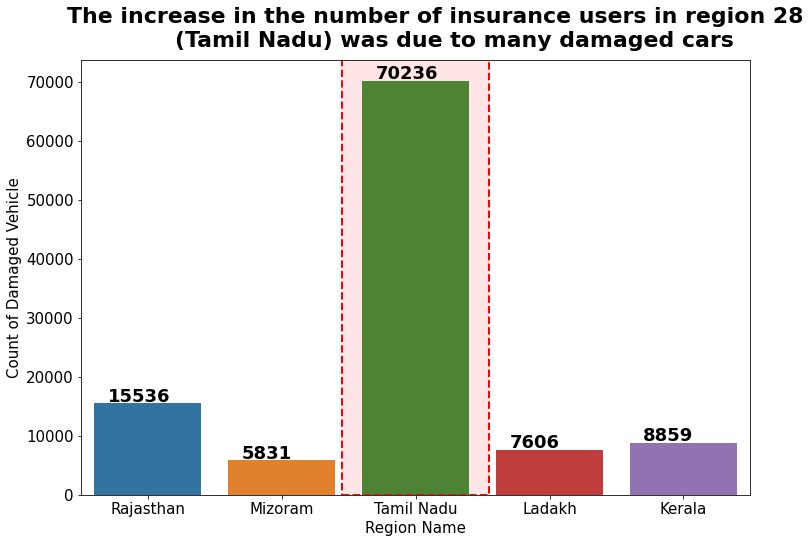

In [ ]:
df_insight_region = df[df['Vehicle_Damage'] == 'Yes'].groupby('Region_Code').count().reset_index().sort_values('Vehicle_Damage', ascending = False).head(5)
df_insight_region
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x = 'Region_Code', y = 'Vehicle_Damage', data =df_insight_region, ax = ax)
plt.xticks(ticks = [0,1,2,3,4], labels = ['Rajasthan', 'Mizoram', 'Tamil Nadu', 'Ladakh', 'Kerala'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Region Name',fontsize=15)
plt.ylabel(ylabel = 'Count of Damaged Vehicle',fontsize=15)

# df_insight_region
cnt_insight_region = list(df_insight_region.sort_values('Region_Code')['Response'])
reg_insight_region = list(df_insight_region.sort_values('Region_Code')['Region_Code'])

for i in range(0,len(cnt_insight_region)):
    plt.text(x = i -0.3
             , y = cnt_insight_region[i] + 300
             , s=str(cnt_insight_region[i])
             , fontsize=18 
             , fontweight='bold')
    
plt.text(x =-0.6, y= 80000, s = 'The increase in the number of insurance users in region 28', fontweight = 'bold', fontsize = 22)
plt.text(x =0.2, y= 76000, s = '(Tamil Nadu) was due to many damaged cars', fontweight = 'bold', fontsize = 22)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((1.45, 0), 1.1, 75000, fill=True, facecolor ='red', alpha=0.1))
ax.add_patch(Rectangle((1.45, 0), 1.1, 75000, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))

Text(65, 0.047, 'with 1811 people')

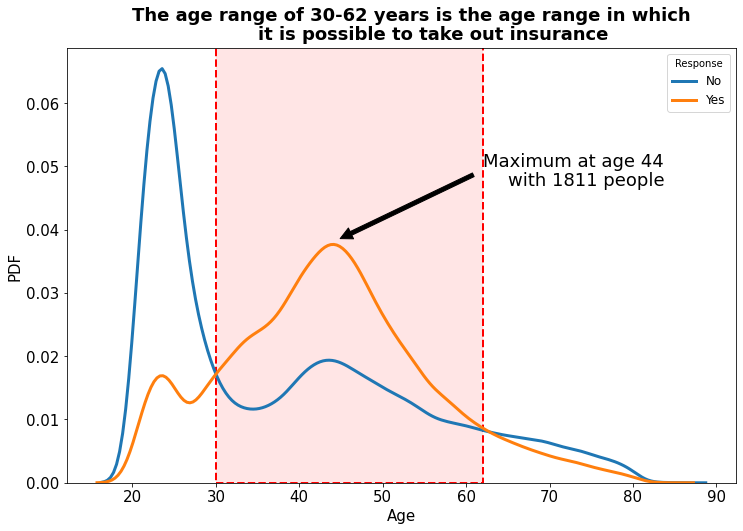

In [ ]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(df[df['Response'] == 0]['Age'],hist = False, kde_kws ={"lw" :3}, ax = ax)
sns.distplot(df[df['Response'] == 1]['Age'],hist = False, kde_kws ={"lw" :3}, ax = ax)
plt.legend(title = 'Response', labels = ['No', 'Yes'], fontsize = 12)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Age',fontsize=15)
plt.ylabel(ylabel = 'PDF',fontsize=15)

from matplotlib.patches import Rectangle
import matplotlib.patches as patches
ax.add_patch(Rectangle((30, 0), 32, 0.07, fill=True, facecolor ='red', alpha=0.1))
ax.add_patch(Rectangle((30, 0), 32, 0.07, fill=None, edgecolor='red', alpha=1, linestyle = '--', linewidth = 2))

plt.text(x =20, y= 0.073, s = 'The age range of 30-62 years is the age range in which ', fontweight = 'bold', fontsize = 18)
plt.text(x =35, y= 0.07, s = 'it is possible to take out insurance', fontweight = 'bold', fontsize = 18)

countmax_age = df_train[df_train['Response'] == 1].groupby('Age').count().reset_index().sort_values('id', ascending = False).iloc[0,1]
ax.annotate('Maximum at age 44', xy=(44, 0.038), xytext=(62, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 18)
plt.text(x =65, y= 0.047, s = 'with ' + str(countmax_age) + ' people', fontsize = 18)


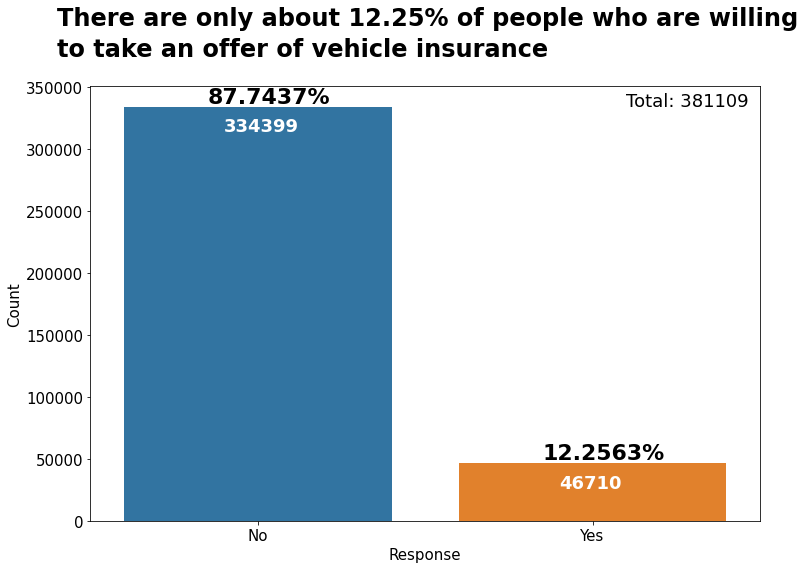

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot('Response', data = df_train, ax = ax)
plt.xticks(ticks = [0, 1], labels = ['No','Yes'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Response',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

percentage_response = []
count = []
count.append(df['Response'].value_counts().reset_index()['Response'][0])
count.append(df['Response'].value_counts().reset_index()['Response'][1])
total = sum(count)
percentage_response.append(count[0]/(count[0]+count[1]) * 100)
percentage_response.append(count[1]/(count[0]+count[1]) * 100)

for i in range(0,len(percentage_response)):
    plt.text(x = i - 0.10
             , y = count[i] - 20000
             , s=str(round(count[i]))
             , fontsize=18 
             , fontweight='bold'
             , color = 'white')
    plt.text(x = i - 0.15
             , y = count[i] + 3000
             , s=str(round(percentage_response[i], 4)) + '%'
             , fontsize=22 
             , fontweight='bold')
plt.text(x =1.1, y= 335000, s = 'Total: ' + str(total), fontsize = 18)

plt.text(x =-0.6, y= 400000, s = 'There are only about 12.25% of people who are willing', fontweight = 'bold', fontsize = 24)
plt.text(x =-0.6, y= 375000, s = 'to take an offer of vehicle insurance', fontweight = 'bold', fontsize = 24)

plt.savefig('responsecount.png', bbox_inches = 'tight')

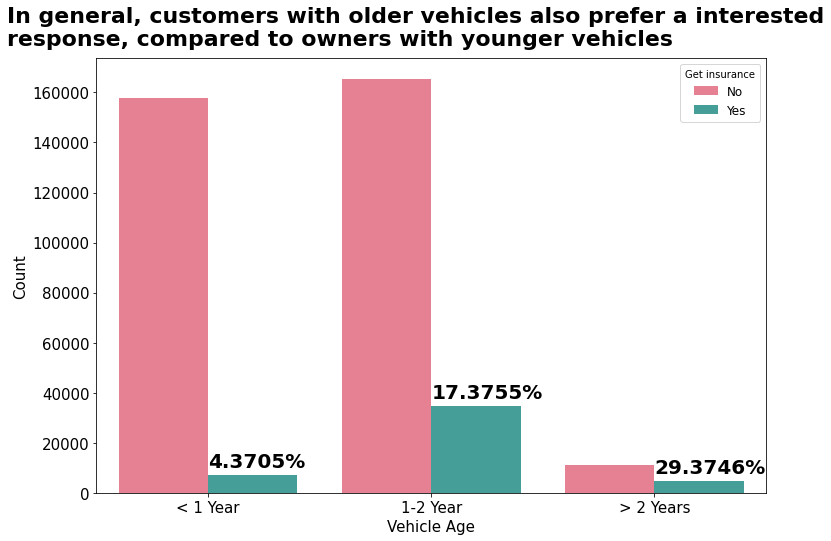

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
sns.countplot('Vehicle_Age',hue='Response',data=df_train ,ax=ax,palette='husl', order=["< 1 Year", "1-2 Year", "> 2 Years"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(xlabel = 'Vehicle Age',fontsize=15)
plt.ylabel(ylabel = 'Count',fontsize=15)

plt.text(x =-0.9, y= 188000, s = 'In general, customers with older vehicles also prefer a interested', fontweight = 'bold', fontsize = 22)
plt.text(x =-0.9, y= 179000, s = 'response, compared to owners with younger vehicles', fontweight = 'bold', fontsize = 22)
plt.legend(title = 'Get insurance', labels = ['No','Yes'], fontsize = 12)

df_total = df_train.groupby('Vehicle_Age').count().reset_index()
total = []
total.append(df_total.iloc[1,1])
total.append(df_total.iloc[0,1])
total.append(df_total.iloc[2,1])

df_year = df_train[df_train['Response'] == 1].groupby('Vehicle_Age').count().reset_index()
percentage_year = []
percentage_year.append(df_year.iloc[1,1]*100/total[0])
percentage_year.append(df_year.iloc[0,1]*100/total[1])
percentage_year.append(df_year.iloc[2,1]*100/total[2])


count = []
count.append(df_year.iloc[1,1])
count.append(df_year.iloc[0,1])
count.append(df_year.iloc[2,1])
for i in range(0,len(percentage_year)):
    plt.text(x = i 
             , y = count[i] + 3000
             , s=str(round(percentage_year[i],4)) + '%'
             , fontsize=20
             , fontweight='bold')

Insight: Mayoritas Pelanggan yang memiliki kendaraan dengan umur lebih tua (1-2 tahun & >2 tahun) tampak lebih responsif dengan penawaran Asuransi Kendaraan. Secara umum, pelanggan dengan kendaraan tua juga lebih memilih respon 'tertarik', dibandingkan dengan kendaraan muda

Insights & Tips Summary:

1. Mayoritas Pelanggan yang memiliki kendaraan dengan umur lebih tua (1-2 tahun & >2 tahun) tampak lebih responsif dengan penawaran Asuransi Kendaraan. Secara umum, pelanggan dengan kendaraan tua juga lebih memilih respon 'tertarik', dibandingkan dengan kendaraan muda
2.  Orang-orang pada region code 28 merupakan tempat yang cocok untuk meningkatkan jumlah pelanggan
3.  Tingkat penerimaan asuransi pada region code 28 paling tinggi, yaitu sampai menyentuh 23,03% disusul dengan Region Code 29, lalu 41, dan 11
4.  Banyaknya orang yang mengasuransikan kendaraanya di region 28 dikarenakan orang-orang pada region 28 sudah pernah merasakan kendaraannya rusak.
5.  Potensial buyer adalah rentang usia 30 sampai 64 tahun
